In [30]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#from lightcurve_plots import plot_save_lc

## add names column

In [31]:
lc139_df = pd.read_csv('../images4/lc30.data', delim_whitespace=True, header=None)

lc139_df.columns = ['jd', 'value', 2, 3, 4, 5]

lc139_df

/tmp/ipykernel_97194/3914708989.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc139_df = pd.read_csv('../images4/lc30.data', delim_whitespace=True, header=None)


,jd,value,2,3,4,5
0,31.831055,3657.4179,225.1915,3593.6744,236.4294,0.8853
1,31.833791,4296.4375,215.3493,4230.5870,226.1211,0.9416
2,31.836491,4075.6229,227.8781,4063.3398,234.7852,0.9519
3,31.839226,4383.5960,219.2858,4336.2515,228.8721,0.9554
4,31.841925,4407.1314,219.9445,4329.7120,229.9196,0.9443
...,...,...,...,...,...,...
471,41.973402,4007.7397,286.2550,3912.7361,289.3041,0.7956
472,41.976164,4673.3418,277.7164,4535.4527,280.7153,0.8708
473,41.978922,5213.9562,281.9252,5179.8312,284.4562,0.8705
474,41.981684,4974.8098,308.1785,4863.5645,310.3904,0.8613


In [33]:
dates_df = pd.read_csv('../register4/dates', delim_whitespace=True, header=None)
dates_df.columns = ['name', 'jd']

dates_df

/tmp/ipykernel_97194/1793749316.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dates_df = pd.read_csv('../register4/dates', delim_whitespace=True, header=None)


,name,jd
0,202405010178o.fits,31.831055
1,202405010180o.fits,31.833791
2,202405010182o.fits,31.836491
3,202405010184o.fits,31.839226
4,202405010186o.fits,31.841925
...,...,...
471,202405110301o.fits,41.973402
472,202405110303o.fits,41.976164
473,202405110305o.fits,41.978922
474,202405110307o.fits,41.981684


In [34]:
lc139_df_w_names = pd.merge(lc139_df, dates_df[['jd', 'name']], on='jd', how='left')

lc139_df_w_names


,jd,value,2,3,4,5,name
0,31.831055,3657.4179,225.1915,3593.6744,236.4294,0.8853,202405010178o.fits
1,31.833791,4296.4375,215.3493,4230.5870,226.1211,0.9416,202405010180o.fits
2,31.836491,4075.6229,227.8781,4063.3398,234.7852,0.9519,202405010182o.fits
3,31.839226,4383.5960,219.2858,4336.2515,228.8721,0.9554,202405010184o.fits
4,31.841925,4407.1314,219.9445,4329.7120,229.9196,0.9443,202405010186o.fits
...,...,...,...,...,...,...,...
471,41.973402,4007.7397,286.2550,3912.7361,289.3041,0.7956,202405110301o.fits
472,41.976164,4673.3418,277.7164,4535.4527,280.7153,0.8708,202405110303o.fits
473,41.978922,5213.9562,281.9252,5179.8312,284.4562,0.8705,202405110305o.fits
474,41.981684,4974.8098,308.1785,4863.5645,310.3904,0.8613,202405110307o.fits


## rejection

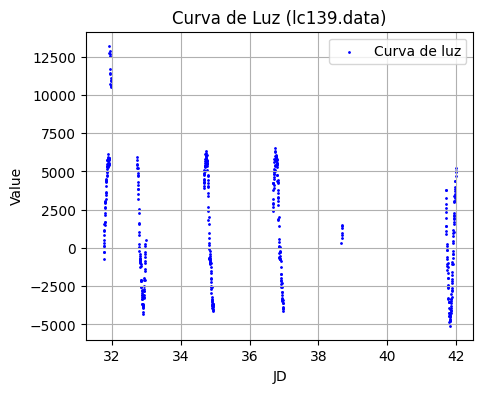

In [36]:
# Generar la grafica
plt.figure(figsize=(5, 4))
plt.scatter(lc139_df_w_names['jd'], lc139_df_w_names['value'], s=1, color='blue', label='Curva de luz')
plt.xlabel('JD')
plt.ylabel('Value')
plt.title('Curva de Luz (lc139.data)')
plt.legend()
plt.grid()
#plt.show()

implementamos

In [37]:
# Convertir la columna 'value' a un array de NumPy
elements = np.array(lc139_df_w_names['value'])

# Calcular la media y la desviación estándar
mean = np.mean(elements)
sd = np.std(elements)

# Filtrar el DataFrame
filtered_df = lc139_df_w_names[
    (lc139_df_w_names['value'] > mean - 2 * sd) & 
    (lc139_df_w_names['value'] < mean + 2 * sd)
]

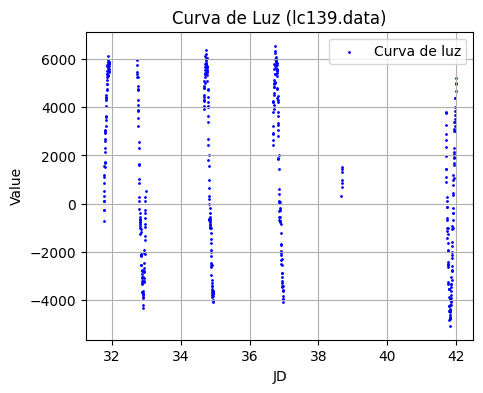

In [39]:
# Generar la grafica
plt.figure(figsize=(5, 4))
plt.scatter(filtered_df['jd'], filtered_df['value'], s=1, color='blue', label='Curva de luz')
plt.xlabel('JD')
plt.ylabel('Value')
plt.title('Curva de Luz (lc139.data)')
plt.legend()
plt.grid()
#plt.show()

In [40]:
filtered_df.describe()

,jd,value,2,3,4,5
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,36.183053,1059.845081,267.235969,1016.849413,274.714104,0.769658
std,3.532507,3488.816861,37.191287,3498.238990,35.766507,0.253324
min,31.762680,-5082.744400,173.277400,-5068.452500,177.472900,0.003600
25%,32.897700,-2129.629200,240.970900,-2197.606900,249.453900,0.681600
50%,34.906261,873.140000,260.683200,830.138300,268.785300,0.888000
75%,36.968610,4463.582500,288.059000,4454.746600,294.196300,0.945700
max,41.984419,6563.526100,453.717300,6515.504100,456.302300,0.984900


In [41]:
lc139_df_w_names.describe()

,jd,value,2,3,4,5
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,36.049877,1391.825437,266.660008,1352.866736,274.053338,0.774093
std,3.553981,3899.794175,36.849128,3918.719187,35.496959,0.250532
min,31.762680,-5082.744400,173.277400,-5068.452500,177.472900,0.003600
25%,32.864329,-2079.021625,240.707200,-2183.320650,249.376875,0.702300
50%,34.885776,1078.383850,260.340100,1045.814550,268.094050,0.893300
75%,36.958383,4776.749500,286.168900,4764.861625,293.378950,0.945325
max,41.984419,13216.672200,453.717300,13379.100700,456.302300,0.984900


In [42]:
# Filtrar el DataFrame para obtener las filas que NO cumplen la condición (descartados)
discarded_df = lc139_df_w_names[
    ~((lc139_df_w_names['value'] > mean - 2 * sd) & 
      (lc139_df_w_names['value'] < mean + 2 * sd))
]

discarded_df

,jd,value,2,3,4,5,name
37,31.931653,12769.4873,255.0443,12891.7883,259.5286,0.9319,202405010252o.fits
38,31.934353,13216.6722,263.0448,13379.1007,267.6944,0.9479,202405010254o.fits
39,31.937083,12650.8808,257.2218,12762.0583,261.4844,0.9426,202405010256o.fits
40,31.939789,12844.2083,252.2855,12912.5827,256.8419,0.9357,202405010258o.fits
41,31.942523,12531.0588,256.5565,12631.7199,261.4324,0.9339,202405010260o.fits
42,31.945223,10703.6485,265.2002,11026.9257,270.1994,0.9024,202405010262o.fits
43,31.958358,11425.5349,243.6238,11385.5474,249.5322,0.8992,202405010269o.fits
44,31.961097,11361.6380,219.8945,11436.8831,225.4508,0.8934,202405010271o.fits
45,31.963837,11708.1924,226.4971,11787.3709,231.4289,0.9027,202405010273o.fits
46,31.966566,10981.0381,232.8504,11048.9177,238.2654,0.8932,202405010275o.fits


In [43]:
discarded_df['name']

37    202405010252o.fits
38    202405010254o.fits
39    202405010256o.fits
40    202405010258o.fits
41    202405010260o.fits
42    202405010262o.fits
43    202405010269o.fits
44    202405010271o.fits
45    202405010273o.fits
46    202405010275o.fits
47    202405010277o.fits
48    202405010279o.fits
49    202405010281o.fits
50    202405010283o.fits
51    202405010285o.fits
Name: name, dtype: object

In [44]:
discarded_df['value'].sort_values()

50    10540.4858
51    10556.7782
47    10656.0533
42    10703.6485
48    10892.9180
46    10981.0381
49    11081.7310
44    11361.6380
43    11425.5349
45    11708.1924
41    12531.0588
39    12650.8808
37    12769.4873
40    12844.2083
38    13216.6722
Name: value, dtype: float64